Task 1




#Questions :
# We have the min and max temperatures in a city In India for each months of the year. We would like to find a function 
# to describe this and show it graphically, the dataset given below.

# Task:
# 1. fitting it to the periodic function
# 2. plot the fit

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

max_temp = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
min_temp = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

Text(0, 0.5, 'Min and max temperature')

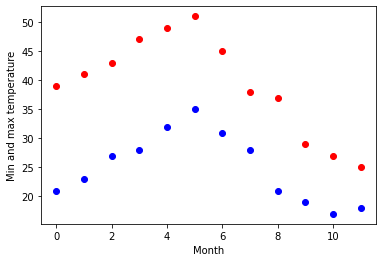

In [10]:
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, max_temp, 'ro')
plt.plot(months, min_temp, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [11]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, min_temp, [-40, 20, 0])

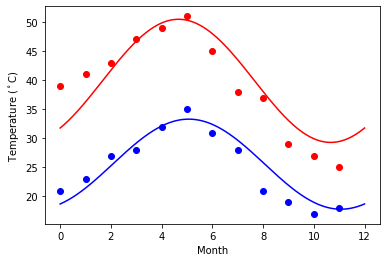

In [12]:


days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()



Task 2

In [1]:
import numpy as np
import pandas as pd
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
len(titanic)


1310

#Charts to plot:
# Question No 1. Create a pie chart presenting the male/female proportion

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Male_Female_Prop = titanic['sex']
Male_Female_Prop.value_counts()

male      843
female    466
Name: sex, dtype: int64

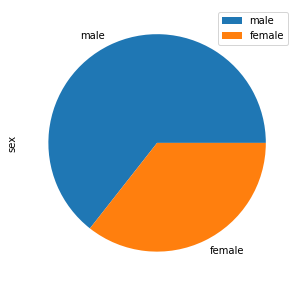

In [5]:
Male_Female_Prop.value_counts().plot(kind='pie',legend=True,figsize=(5,5))



# Question No 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender



In [6]:
fare_age = titanic[['fare','age']]

titanic.age.fillna(method='ffill')
fare_age.fillna(method='backfill')

,fare,age
0,211.3375,29.0000
1,151.5500,0.9167
2,151.5500,2.0000
3,151.5500,30.0000
4,151.5500,25.0000
...,...,...
1305,14.4542,26.5000
1306,7.2250,26.5000
1307,7.2250,27.0000
1308,7.8750,29.0000


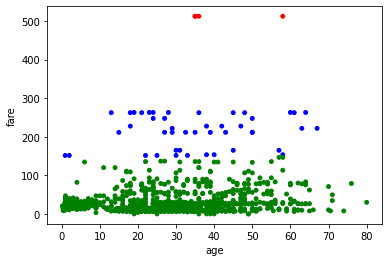

In [8]:
#colors = np.where(fare_age.fare < 100, '*','o')

col = []
for j in fare_age.fare:
    if j <150:
        col.append('g')

    elif j < 300:
        col.append('b')

    else:
        col.append('r')

fare_age.plot(kind='scatter', x='age', y='fare',c=col,s=15,marker="o",legend=True)